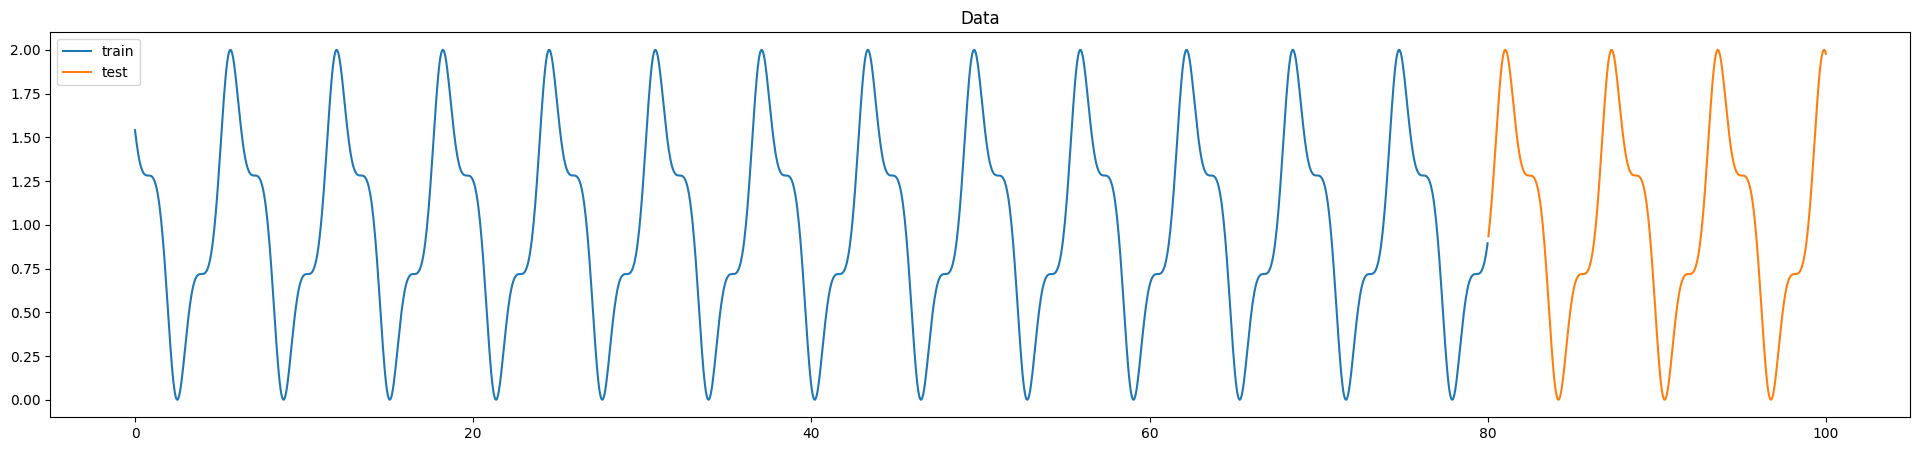

In [22]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

def f(x):
  return 1 + np.cos(x + (np.cos(x))**2)

x = np.linspace(0, 100, 2000)
y = [f(i) for i in x]

test_size = 400
x_train = x[:-test_size]
y_train = y[:-test_size]
x_test = x[-test_size:]
y_test = y[-test_size:]

fig, axes = plt.subplots(ncols=1, figsize=(24, 5))
axes.plot(x_train, y_train, label='train')
axes.plot(x_test, y_test, label='test')
axes.set_title('Data')
axes.legend()
plt.show()

In [25]:
sequence_x = list(TimeseriesGenerator(x_train, x_train, 4, batch_size=1))
sequence_y = list(TimeseriesGenerator(x_train[4:], x_train[4:], 3, batch_size=1))

train_seqs = []
y_train = []
for (x_seq, next_x), (next_seq, _) in zip(sequence_x, sequence_y):
    seq = np.append(x_seq.reshape(4,), next_seq.reshape(3, ))
    
    train_seqs.append(seq)
    y_train.append(next_x)

train_seqs = np.array(train_seqs)
y_train = np.array(y_train)

sequence_x = list(TimeseriesGenerator(x_test, x_test, 4, batch_size=1))
sequence_y = list(TimeseriesGenerator(x_test[4:], x_test[4:], 3, batch_size=1))

test_seqs = []
y_test = []
for (x_seq, next_x), (next_seq, _) in zip(sequence_x, sequence_y):
    seq = np.append(x_seq.reshape(4,), next_seq.reshape(3, ))
    
    test_seqs.append(seq)
    y_test.append(next_x)

test_seqs = np.array(test_seqs)
y_test = np.array(y_test)

# Contruindo o modelo
model = keras.models.Sequential([
    keras.layers.LSTM(128, input_shape=(7, 1), return_sequences=True),
    keras.layers.LSTM(64, return_sequences=True),
    keras.layers.LSTM(32),
    keras.layers.Dense(1)
])

model.compile(loss="mean_absolute_error", optimizer="rmsprop")

# Treinando o modelo
history = model.fit(
    train_seqs, y_train,
    validation_split=0.1,
    batch_size=8,
    epochs=350,
    shuffle=True,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),
        keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)
    ]
)

Epoch 1/350
180/180 [==============================] - 12s 33ms/step - loss: 26.6241 - val_loss: 62.1396 - lr: 0.0010
Epoch 2/350
180/180 [==============================] - 4s 20ms/step - loss: 21.5632 - val_loss: 56.5403 - lr: 0.0010
Epoch 3/350
180/180 [==============================] - 3s 18ms/step - loss: 17.6196 - val_loss: 51.0637 - lr: 0.0010
Epoch 4/350
180/180 [==============================] - 4s 25ms/step - loss: 14.1054 - val_loss: 45.7218 - lr: 0.0010
Epoch 5/350
180/180 [==============================] - 4s 20ms/step - loss: 11.1500 - val_loss: 40.6959 - lr: 0.0010
Epoch 6/350
180/180 [==============================] - 3s 19ms/step - loss: 8.7100 - val_loss: 35.8638 - lr: 0.0010
Epoch 7/350
180/180 [==============================] - 4s 23ms/step - loss: 6.6662 - val_loss: 31.3941 - lr: 0.0010
Epoch 8/350
180/180 [==============================] - 4s 22ms/step - loss: 5.1153 - val_loss: 27.3793 - lr: 0.0010
Epoch 9/350
180/180 [==============================] - 3s 19ms/ste

In [26]:
# prevendo
y_pred = model.predict(test_seqs)

13/13 [==============================] - 2s 13ms/step


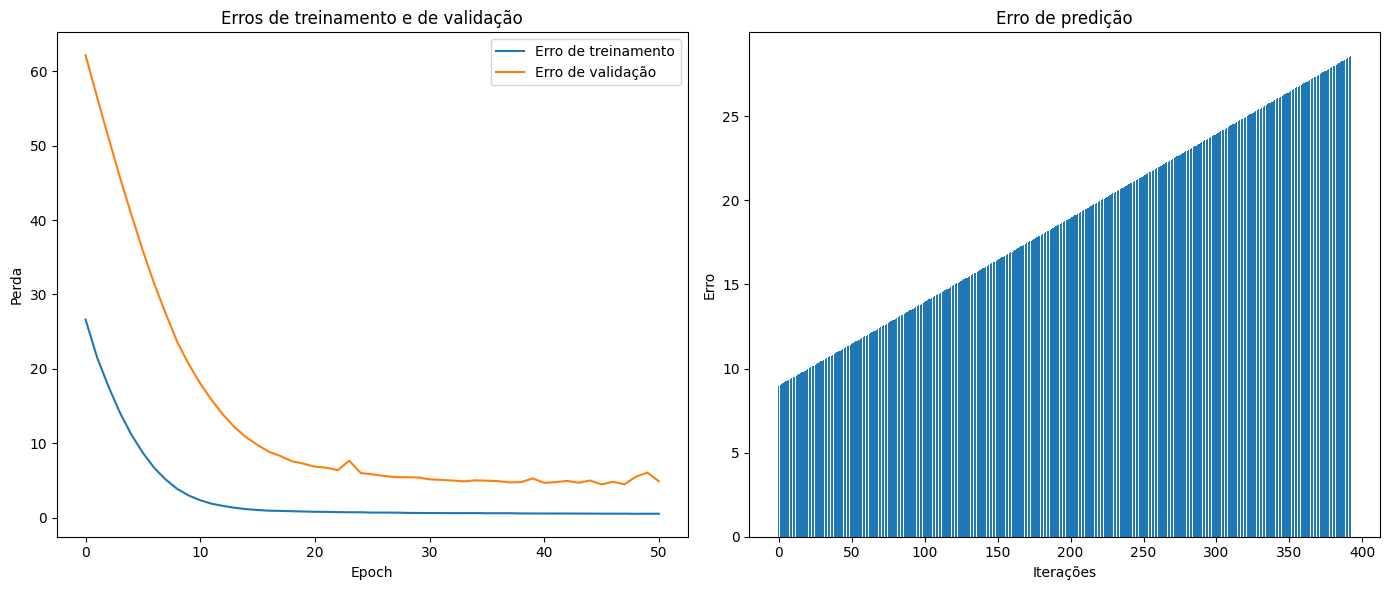

In [30]:
erro = y_test - y_pred

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Erro de treinamento')
plt.plot(history.history['val_loss'], label='Erro de validação')
plt.title('Erros de treinamento e de validação')
plt.xlabel('Epoch')
plt.ylabel('Perda')
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(
    x=range(len(erro)),
    height=erro.flatten()
)
plt.xlabel('Iterações')
plt.ylabel('Erro')
plt.title('Erro de predição')

plt.tight_layout()
plt.show()
